In [2]:
# https://archive.ics.uci.edu/ml/datasets/Auto+MPG
  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. mpg:           continuous
# 2. cylinders:     multi-valued discrete
# 3. displacement:  continuous
# 4. horsepower:    continuous (has missing values)
# 5. weight:        continuous
# 6. acceleration:  continuous
# 7. model year:    multi-valued discrete
# 8. origin:        multi-valued discrete
# 9. car name:      string (unique for each instance)

names=['mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv('D:/tmp/auto-mpg/auto-mpg.data', delimiter=r'\s+',
                 names=names, na_values=['?'])

df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [3]:
df.dropna(inplace=True)

In [4]:
X = df.loc[:, 'cylinders':'origin']
y = df.mpg

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

# Split
train_X, test_X, train_y, test_y = train_test_split(X, y)

# Scale so that SGD works better (otherwise errors are squared)
x_scaler = StandardScaler()
x_scaler.fit(train_X.values)
train_X_scaled = x_scaler.transform(train_X.values)
test_X_scaled = x_scaler.transform(test_X.values)

y_scaler = StandardScaler()
y_scaler.fit(train_y.values.reshape(-1, 1))
train_y_scaled = y_scaler.transform(train_y.values.reshape(-1, 1))
test_y_scaled = y_scaler.transform(test_y.values.reshape(-1, 1))

In [6]:
# Train Linear Regression (non-SGD version) as a baseline for SGDRegressor

from sklearn.linear_model import LinearRegression

linear = LinearRegression() 
linear.fit(train_X_scaled, train_y_scaled)
print(linear.coef_, linear.intercept_)

[[-0.07897551  0.15827443 -0.03116923 -0.69573987  0.04694648  0.33785435
   0.12291668]] [4.339112e-16]


In [7]:
from sklearn.metrics import mean_squared_error, r2_score

pred_y_scaled = linear.predict(test_X_scaled)

print('MSE', mean_squared_error(test_y_scaled, pred_y_scaled))
print('R2', r2_score(test_y_scaled, pred_y_scaled))

MSE 0.17377723275913026
R2 0.8213699776828793


In [8]:
# Train SGD Regression
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty='none',
                  learning_rate='invscaling')
sgd.fit(train_X_scaled, train_y_scaled.ravel())

print(sgd.coef_, sgd.intercept_)

sgd_pred_y_scaled = sgd.predict(test_X_scaled)

print('MSE', mean_squared_error(test_y_scaled, sgd_pred_y_scaled))
print('R2', r2_score(test_y_scaled, sgd_pred_y_scaled))

[-0.11590695 -0.13705367 -0.14282699 -0.30020506 -0.03417177  0.30358123
  0.11722814] [-0.00149038]
MSE 0.19725178601901824
R2 0.7972398893731499


-- Epoch 1
Norm: 0.15, NNZs: 7, Bias: -0.022480, T: 19, Avg. loss: 0.225040
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.21, NNZs: 7, Bias: -0.030971, T: 38, Avg. loss: 0.129217
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.24, NNZs: 7, Bias: -0.037201, T: 57, Avg. loss: 0.102961
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.26, NNZs: 7, Bias: -0.042069, T: 76, Avg. loss: 0.092267
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.28, NNZs: 7, Bias: -0.045473, T: 95, Avg. loss: 0.086769
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.29, NNZs: 7, Bias: -0.047560, T: 114, Avg. loss: 0.083953
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.29, NNZs: 7, Bias: -0.049461, T: 133, Avg. loss: 0.082280
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.30, NNZs: 7, Bias: -0.051028, T: 152, Avg. loss: 0.080988
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.30, NNZs: 7, Bias: -0.052335, T: 171, Avg. loss: 0.080060
Total training time: 0.00 second

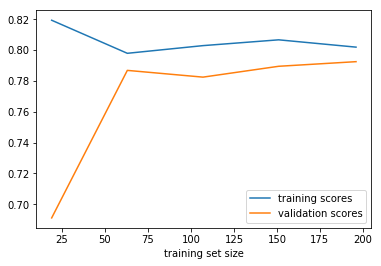

In [9]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    SGDRegressor(max_iter=1000, tol=1e-3, penalty='none',
                 learning_rate='invscaling',
                 verbose=True),
    train_X_scaled, train_y_scaled.ravel())

fig, ax = plt.subplots()
ax.plot(train_sizes, np.mean(train_scores, axis=1), label='training scores')
ax.plot(train_sizes, np.mean(valid_scores, axis=1), label='validation scores')
ax.set_xlabel('training set size')
ax.legend()
plt.show()

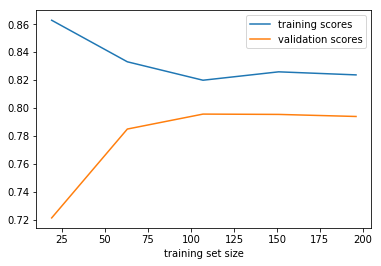

In [10]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),
    train_X_scaled, train_y_scaled.ravel())

fig, ax = plt.subplots()
ax.plot(train_sizes, np.mean(train_scores, axis=1), label='training scores')
ax.plot(train_sizes, np.mean(valid_scores, axis=1), label='validation scores')
ax.set_xlabel('training set size')
ax.legend()
plt.show()

In [11]:
test_X.iloc[0]

cylinders          4.0
displacement      90.0
horsepower        75.0
weight          2125.0
acceleration      14.5
model_year        74.0
origin             1.0
Name: 146, dtype: float64

In [12]:
test_y.iloc[0]

28.0

In [13]:
pred_y = y_scaler.inverse_transform(pred_y_scaled)
pred_y[0]

array([26.04622568])

In [14]:
sgd_pred_y = y_scaler.inverse_transform(sgd_pred_y_scaled)
sgd_pred_y[0]

26.58524555296799

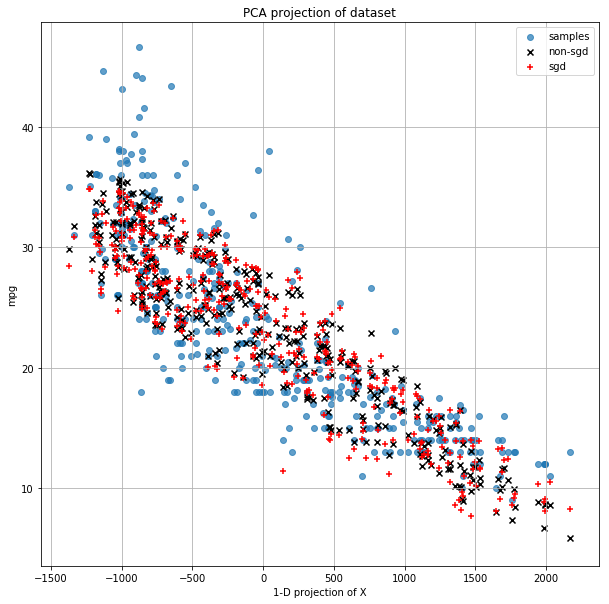

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_hat = pca.fit_transform(X.values)

fig, ax = plt.subplots(figsize=(10, 10))

# plot the dataset
ax.scatter(x_hat.flatten(), y.values, label='samples', alpha=.7)

# plot the linear regression prediction
scaled_X_all = x_scaler.transform(X.values)
y_pred_all = y_scaler.inverse_transform(linear.predict(scaled_X_all))
ax.scatter(x_hat.flatten(), y_pred_all.flatten(), label='non-sgd', color='black', marker='x')

# plot the sgd prediction
sgd_y_pred_all = y_scaler.inverse_transform(sgd.predict(scaled_X_all))
ax.scatter(x_hat.flatten(), sgd_y_pred_all.flatten(), label='sgd', color='red', marker='+')

ax.grid()
ax.set(title='PCA projection of dataset', xlabel='1-D projection of X', ylabel='mpg')
ax.legend()
plt.show()